---
format:
  html:
    theme: united
    embed-resources: true
    code-fold: true
    page-layout: full
    css: styles.css
---

<div style="position: absolute; top: 20px; right: 20px; z-index:1000;">
  <a href="https://www.unicef.ie/donate/#1" target="_blank">
    <img src="logo.png" alt="UNICEF Logo" style="height: 60px; border-radius: 8px;" />
  </a>
</div>

<div style="text-align: center; margin-top: 20px;">

  <h1 style="font-weight: bold; font-size: 1.6rem; color: white; transition: transform 0.3s;"
      onmouseover="this.style.transform='scale(1.05)'; this.style.color='#708090';"
      onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    A Name and Nations: The Right to Identity in a Divided World
  </h1>

  <p style="font-weight: bold; font-size: 1.1rem; color: white; transition: transform 0.3s;"
     onmouseover="this.style.transform='scale(1.05)'; this.style.color='#708090';"
     onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Our story begins with a dark map of silence, millions of children whose births were never recorded and kept in dark. From this global view, the inequalities begin to speak louder.
  </p>

</div>

<div style="display: flex; justify-content: space-between; gap: 20px; margin: 40px auto; font-size: 0.9rem; color: #ccc;">

  <div><strong>AUTHOR:</strong> Trisha Kasi Nagesh (A00013233)</div>
  <div style="text-align:right;"><strong>PUBLISHED:</strong> April 27, 2025</div>

</div>

<div style="border-radius: 16px; box-shadow: 0 20px 25px rgba(255, 255, 255, 0.15); padding: 20px; background-color: black; color: white;">
  


<div class="menu" style="
  max-height: auto;  /* Limit height */
  overflow-y: auto;   /* Scroll vertically if needed */
  background: #181818; 
  padding: 10px;
  border-radius: 8px;
  font-family: 'Segoe UI', sans-serif;
  color: white;
">

  <ul class="menu-content" style="
    list-style: none;
    padding: 0;
    margin: 0;
  ">
    <li><a href="#intro-section" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">Introduction</span></a></li>
    <li><a href="#map-section" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">Global view of birth registration</span></a></li>
    <li><a href="#gender-section" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">Gender Inequality</span></a></li>
    <li><a href="#Gender-Disparity" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">Gender Disparity in Birth Registration</span></a></li>
    <li><a href="#GDP-and-birth-registration-co-relation" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">GDP and birth registration co-relation</span></a></li>
    <li><a href="#GDP-per-capita-over-time" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">GDP per capita over time (case study)</span></a></li>
    <li><a href="#The-Hidden-Risk-to-Children-Identity" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">The Hidden Risk to Children's Identity</span></a></li>
    <li><a href="#conclusion" style="text-decoration: none; color: white; display: flex; align-items: center; padding: 8px;"><span>➤</span><span class="label" style="margin-left: 10px;">Conclusion</span></a></li>
  </ul>

</div>


<div id="intro-section">  
<p style="
    font-weight: bold;
    font-size: 0.9em;
    text-align: center;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';"
>
A legal identity is not just a name on paper-its a child’s first step into recognition, protection, and access to rights like education, healthcare, and citizenship. But what happens when this fundamental right is not granted at birth?
</p>

<p style="color: lightgray; font-size: 0.9em; font-family: 'Segoe UI', sans-serif;">
This story explores global birth registration data (2020–2023), highlighting the stark inequalities across <strong>geography</strong>, <strong>gender</strong>, and <strong>economy</strong>. Using UNICEF data, we unpack how being born in the wrong place or as the wrong gender can make children <strong>invisible</strong>,statistically, legally, and socially. Through maps, charts, and contextual data, we unravel how <strong>economic development</strong>, <strong>gender norms</strong>, and <strong>crisis shocks</strong> collectively shape the identity landscape of under 5years age children worldwide.
</p>
</div>

<div id="map-section"></div>

In [23]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML

df = pd.read_csv('C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_indicator_2.csv')
unicef_metadata = pd.read_csv("C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_metadata.csv")

birth_total = df[
    (df['current_age'] == 'Under 5 years old') &
    (df['sex'] == 'Total') &
    (df['time_period'].between(2020, 2023))
][['country', 'time_period', 'obs_value']].rename(columns={'time_period': 'year'})

population_df = unicef_metadata[
    (unicef_metadata['year'].between(2020, 2023)) &
    (unicef_metadata['Population, total'].notna())
][['country', 'year', 'Population, total', 'alpha_3_code']]

merged = pd.merge(birth_total, population_df, on=['country', 'year'], how='inner')

# unregistered Calculation 
merged['Registered (%)'] = merged['obs_value'].round(2)
merged['Unregistered (%)'] = (100 - merged['obs_value']).round(2)
merged['Total Population'] = merged['Population, total'].apply(lambda x: f"{x:,.0f}")

fig = px.choropleth(
    merged,
    locations='alpha_3_code',
    color='Registered (%)',
    hover_name='country',
    hover_data={'Registered (%)': True,'Unregistered (%)': True,'Total Population': True,'alpha_3_code': False,'obs_value': False,'Population, total': False,'year': False
    },
    animation_frame='year',
    color_continuous_scale='Tealrose',
    title='Birth Registration (%) of Under-5 Children (2020–2023)',
    projection='natural earth'
)

# Styling
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    geo_bgcolor='black',
    coloraxis_colorbar=dict(title='Registration %')
)

HTML(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))



  <p style="
    font-weight: bold;
    font-size: 0.9em;
    text-align: center;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';"
>
  <span style="display: block;">Every Child Counts, But Not Every Child is Counted!!</span>
  <span style="display: block;">It reveals millions of children are never registered not because of who they are, but where they are born.</span>
</p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.2; padding: 10px 5px;">This map visualizes the global landscape of birth registration between <strong>2020 and 2023</strong>.Each country is shaded based on the percentage of children under age 5 who are officially registered at birth. Hovering over a country reveals three key metrics: <strong>the percentage of registered children, the percentage of unregistered children, and the total national population</strong>.</p>

<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.2; padding: 10px 5px;">
  The global view of birth registration reveals vast disparities between countries.Countries such as Nigeria, Yemen face institutional and conflict-related barriers that leave millions of children invisible. By contrast, nations like Canada, Japan achieve near-universal registration, thanks to strong systems and inclusive policies.Even in high-performing countries, the numbers are massive-in 2020, China’s 96.7% coverage still left 46.5 m approx children unregistered, nearly the population of Spain.</p>


<div id="gender-section"></div>


<div style="display: flex; width: 100%;">

  <div style="width: 40%; padding: 20px; background-color: #2e2e2e; color: white; ">
<p style="
      font-weight: bold;
      font-size: 0.9em;
      transition: transform 0.3s;
      font-family: 'Segoe UI', sans-serif; color: white;
      margin-top:90px"
      onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
      onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    In the places where children are registered, are they registered equally? Not always. Being a girl can still mean being invisible.
  </p>

 <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; margin-top:40px"> 
In developed nations, gender equality begins at birth. Equal registration of boys and girls ensures both are counted, protected, and given access to rights like education and healthcare and many more.</p>
<div style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.2; padding: 10px 5px;">

<p><strong>In most of the high-income countries</strong>, both <strong>male and female registration rates are at 100%</strong> a clear sign of equality. Countries with perfect registration for both genders (e.g., <em>Austria, Canada</em>) contrast sharply with those where girls are still left behind.</p>

<p>This contrast reinforces a global reality: wealthier nations not only register more children but do so <strong>equitably across genders</strong>.This discrepancy begins at birth and compounds over time, contributing to long-term exclusion from services, rights, and social safety nets which essentially institutionalizing gender bias.</p></div></div>


<div style="width: 60%; padding: 20px; background-color: #1e1e1e; color: white;">



In [24]:
from plotnine import *
import pandas as pd
import plotly.express as px
from IPython.display import HTML, display

df = pd.read_csv('C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_indicator_2.csv')

filtered_df = df.loc[(df['current_age'] == "Under 5 years old") &(df['time_period'] >= 2020) &(df['time_period'] <= 2023) &(df['sex'].isin(['Male', 'Female'])),
    :
].copy()

avg_order = (
    filtered_df.groupby('country', observed=False)['obs_value']
    .mean()
    .sort_values()
    .index
)

filtered_df = filtered_df.assign(
    country=pd.Categorical(
        filtered_df['country'],
        categories=avg_order,
        ordered=True
    )
)

grouped_df = filtered_df.groupby(
    ['country', 'sex'], 
    as_index=False, 
    observed=False
)['obs_value'].mean()

bar_chart = (
    ggplot(grouped_df, aes(x='country', y='obs_value', fill='sex')) +
    geom_bar(stat='identity', position='dodge', width=0.7) +
    labs(
        title='Average Birth Registration (2020–2023)',
        x='Country',
        y='Average % Registered (Under Age 5)',
        fill='Sex'
    ) +
    scale_fill_manual(values={'Male': '#00bfc4', 'Female': '#f8766d'}) +
    theme_minimal() +
    theme(
        figure_size=(14, 7),
        axis_text_x=element_text(rotation=90, ha='center'),
        plot_margin=0.2,
        axis_title_x=element_text(margin={'t': 20}),
        legend_position='top'
    )
)

bar_chart.draw() 

# Interactive Plot i created for this visualization
fig = px.bar(
    grouped_df,
    x='country',
    y='obs_value',
    color='sex',
    barmode='group',
    hover_data={'sex': True, 'obs_value': ':.1f'},
    labels={'obs_value': '% of Registered children(Under 5)'},
    color_discrete_map={'Male': '#00bfc4', 'Female': '#f8766d'}
)

fig.update_layout(
    title='Average Birth Registration (2020–2023)',
    width=1200,
    height=600,
    margin=dict(l=50, r=50, b=200, t=50),
    xaxis=dict(tickangle=-60),
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white',
    autosize=False
)


HTML(fig.to_html(full_html=False, include_plotlyjs='cdn'))



</div>
</div>

<div id="Gender-Disparity"></div>

<p style="
      font-weight: bold;
      font-size: 0.9em;
      transition: transform 0.3s;
      font-family: 'Segoe UI', sans-serif; color: white;
      margin-top:20px;text-align: center;"
      onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
      onmouseout="this.style.transform='scale(1)'; this.style.color='white';">The right to identity isn’t always equal.In several regions, girls are left behind unregistered, unrecognized, and unprotected from birth.</p>

In [ ]:
import pandas as pd
from plotnine import *
from IPython.display import HTML
import plotly.io as pio
import plotly.express as px

df = pd.read_csv("C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_indicator_2.csv")

df_gap = df[
    (df['current_age'] == "Under 5 years old") &
    (df['time_period'] >= 2020) &
    (df['time_period'] <= 2023) &
    (df['sex'].isin(["Male", "Female"]))
]

pivoted = (
    df_gap
    .groupby(['country', 'sex'], as_index=False, observed=False)['obs_value']
    .mean()
    .pivot(index='country', columns='sex', values='obs_value')
    .dropna()
)

pivoted['gender_gap'] = pivoted['Male'] - pivoted['Female']
pivoted = pivoted.reset_index().sort_values('gender_gap', ascending=False)

pivoted['country'] = pd.Categorical(
    pivoted['country'],
    categories=pivoted['country'],
    ordered=True
)

gender_gap_plot = (
    ggplot(pivoted, aes(x='country', y='gender_gap', fill='gender_gap')) +
    geom_bar(stat='identity', show_legend=False) +
    geom_hline(yintercept=0, linetype="dashed", color="white") +
    labs(
        title='Gender Disparity in Birth Registration (2020–2023)',
        subtitle=        '↓ % of More boys are registered                                                                                                                                                                                                                                ↓ % of More girls are registered',
        x='Country',
        y='Avg. Gender Gap (Male - Female)'
        
    ) +
    scale_fill_gradient2(low="#00BFC4", mid="white", high="#F8766D", midpoint=0) +
    theme_minimal() +
    theme(
        figure_size=(10, 4),
        axis_text_x=element_text(rotation=90, size=7, color='white'),
        axis_text_y=element_text(color='white'),
        axis_title=element_text(color='white'),
        plot_title=element_text(size=13, weight='bold', color='white'),
        plot_subtitle=element_text(size=9, color='white'),
        panel_background=element_rect(fill="#1e1e1e"),
        plot_background=element_rect(fill="#1e1e1e"),
        panel_grid_major=element_line(color='#333333'),
        panel_grid_minor=element_blank()
    )
)


# gender_gap_plot
#for better visualization i created a interactive one which is-

fig = px.bar(
    pivoted,
    x='country',
    y='gender_gap',
    color='gender_gap',
    labels={'gender_gap': 'Gender Gap %'},
    color_continuous_scale=[ "#00BFC4", "white", "#F8766D"],
    title='Gender Disparity in Birth Registration (2020–2023)',
    subtitle=  '↓ % of More boys are registered                                                                                                                                                                                                                                   ↓ % of More girls are registered',
    hover_data={'country': True, 'gender_gap': ':.1f'}
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=0.5
)

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Avg. Gender Gap (Male - Female)",
    plot_bgcolor="#1e1e1e",
    paper_bgcolor="#1e1e1e",
    font_color="white",
    xaxis_tickangle=90,
    margin=dict(t=60, b=80),
    coloraxis_colorbar=dict(
        title="Gap",
        ticks="outside"
    )
)


HTML(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))


<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;margin-top:20px">Countries like <strong>Swaziland</strong>, <strong>Malawi</strong>, and <strong>Nepal</strong> show significant levels of gender disparity in registration, with more boys being registered than girls. Even where systems exist, <strong>deep-rooted cultural norms</strong> may still prioritize sons over daughters.</p>

<p style= "margin-top: 20px; font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;"> According to <strong>UNICEF</strong>, <em>girls in rural or patriarchal societies are often excluded from official systems</em>, making them invisible in national statistics and vulnerable to being left behind in rights-based development.However, there are beacons of progress: countries like <strong>Tuvalu</strong> and <strong>Madagascar</strong> show <strong>gender-equal or female-favored</strong> registration rates, proving that equity is possible where inclusive values and effective policies align.
</p>

<div id="GDP-and-birth-registration-co-relation"></div>

<div style="display: flex; background-color: #222222; padding: 10px;">
<div style="width: 60%; padding: 10px; max-height: 600px; overflow-y: auto; color: white; font-family: 'Segoe UI', sans-serif;">


  

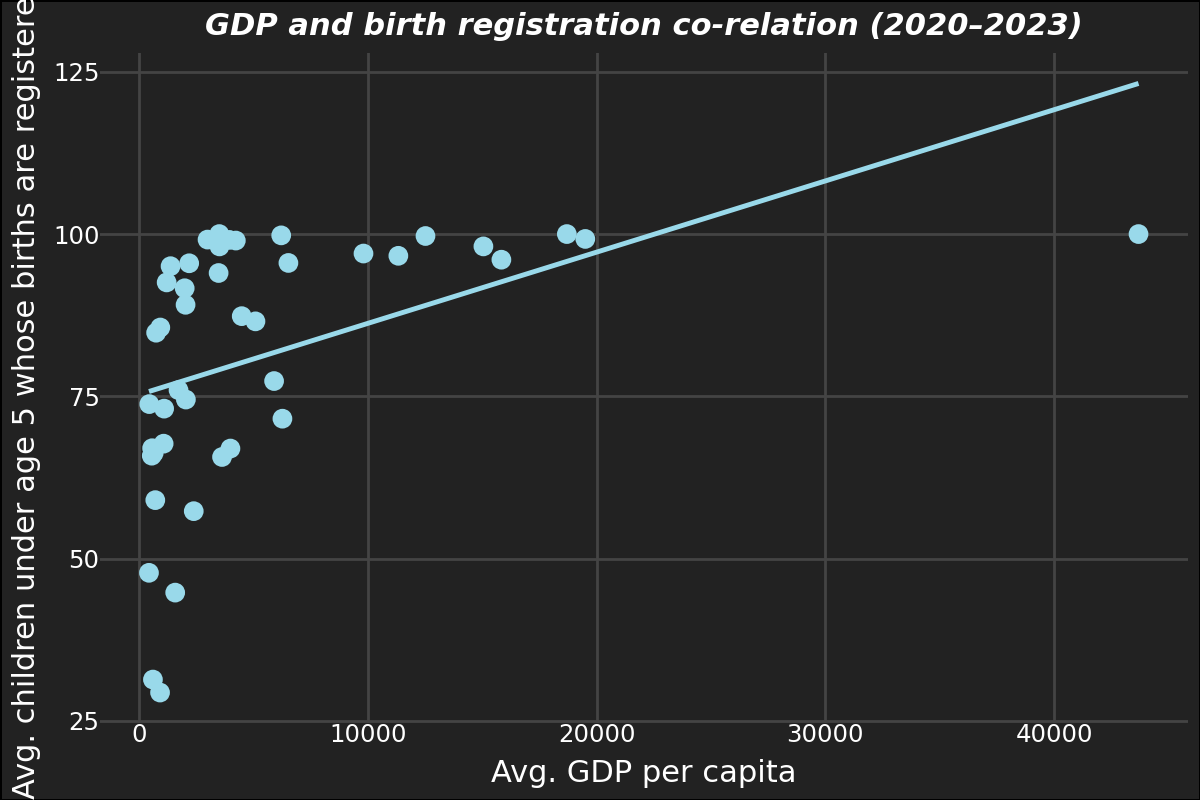

In [26]:
from plotnine import *
import pandas as pd

gdp_recent = unicef_metadata[
    (unicef_metadata['year'] >= 2020) &
    (unicef_metadata['year'] <= 2023) &
    (unicef_metadata['GDP per capita (constant 2015 US$)'].notna())
]

avg_gdp = (
    gdp_recent.groupby('country', as_index=False)['GDP per capita (constant 2015 US$)']
    .mean()
    .rename(columns={'GDP per capita (constant 2015 US$)': 'avg_gdp_per_capita'})
)

birth_df = df[(df['current_age'] == "Under 5 years old") &(df['time_period'] >= 2020) &(df['time_period'] <= 2023) &(df['sex'].isin(['Male', 'Female']))
]

avg_birth = (
    birth_df.groupby('country', as_index=False)['obs_value']
    .mean()
    .rename(columns={'obs_value': 'avg_birth_registration'})
)

merged_df = pd.merge(avg_gdp, avg_birth, on='country', how='inner')

chart = (
    ggplot(merged_df, aes(x='avg_gdp_per_capita', y='avg_birth_registration')) +
    geom_point(color='#99d9ea', size=3) +
    geom_smooth(method='lm', color='#99d9ea', se=False) +
    labs(
        title='GDP and birth registration co-relation (2020–2023)',
        x='Avg. GDP per capita',
        y='Avg. children under age 5 whose births are registered'
    ) +
    theme_minimal() +
    theme(
        figure_size=(6, 4),
        plot_title=element_text(weight='bold', style='italic', size=11, color='white'),
        axis_title=element_text(color='white'),
        axis_text=element_text(color='white'),
        panel_background=element_rect(fill='#222222'),
        plot_background=element_rect(fill='#222222'),
        panel_grid_major=element_line(color='#444444'),
        panel_grid_minor=element_blank(),
        
    )
)

chart


</div>

<div style="width: 40%; padding: 10px; color: white;max-height: 600px; overflow-y: auto;font-family: 'Segoe UI', sans-serif; overflow-y: auto; max-height: 600px;">

  
  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Birth registration is the first step toward legal identity. Without it, millions of children remain statistically invisible, lacking access to schooling, healthcare, and protection from exploitation.
  </p>

  
  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Legal identity doesn’t exist in isolation, it relies on <strong>infrastructure</strong>, <strong>access</strong>, and <strong>governance</strong>, all deeply tied to a country’s <strong>economic capacity</strong>. This scatterplot reveals reality in stark terms.
  </p>

  
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.5; padding: 10px 5px; text-align: left;">
    Each point on this chart represents a country, comparing its <strong>GDP per capita</strong> with the share of under-5 children registered at birth between 2020 and 2023. The upward trendline shows that <strong> the birth registration rate increases as gdp tend to increase</strong>.
  </p>

  
  <p style="
    font-size: 0.9em;
    font-style: italic;
    color: lightgray;
    text-align: center;
    transition: transform 0.3s;"
    onmouseover="this.style.transform='scale(1.02)'; this.style.color='#FFDD57';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='lightgray';">
    “Poverty doesn’t just steal food or shelter. It steals identity.”
  </p>

  
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.5; padding: 10px 5px; text-align: left;">
    The takeaway is sobering: <strong>millions of children remain invisible</strong> not by choice, but because their countries are too poor to count them. Until economic growth is matched with <strong>inclusive policies</strong>, the right to identity will remain out of reach for many.
  </p>




<div style="background:#202020; font-family: 'Segoe UI', sans-serif; padding: 10px;">

  <button onclick="toggleInsight()" style="
      background: linear-gradient(135deg, #00bcd4, #008cba);
      color: white;
      padding: 14px 28px;
      font-size: 1rem;
      font-weight: bold;
      border: none;
      border-radius: 30px;
      cursor: pointer;
      transition: 0.4s;
      box-shadow: 0 4px 15px rgba(0,188,212,0.4);
      margin-bottom: 20px;
  ">
    FOR MORE INSIGHT CLICK HERE
  </button>

  <div id="insightBox" style="
      margin-top: 20px;
      background-color:#202020;
      color: lightgray;
      padding: 18px;
      border-left: 5px solid #00bcd4;
      border-radius: 8px;
      font-size: 0.9em;
      line-height: 1.5;
      width: 500px;   
      max-width: 90%; 
      text-align: left;
      display: none;
      transition: all 0.5s ease;">According to UNICEF data, countries like Norway, Ireland, and Australia with GDPs over $30,000 achieve nearly 100% registration. In contrast, nations like Yemen, South Sudan, and Niger, with GDPs under $5,000, often register less than half their children.The upward trendline also confirmed that <strong>wealthier nations consistently register more children.
  </div>

  <script>
    function toggleInsight() {
      var box = document.getElementById("insightBox");
      if (box.style.display === "none" || box.style.display === "") {
        box.style.display = "block";
      } else {
        box.style.display = "none";
      }
    }
  </script>

</div>
</div></div>



<div id="GDP-per-capita-over-time"></div>

 <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray; line-height: 1.5; padding: 10px 5px; text-align: left;">
    This line plot traces GDP per capita from 1960 to 2023 for <strong>India, China, Ireland, the UK</strong>, and the <strong>US</strong>-five nations reflecting distinct economic journeys and identity outcomes.Understanding GDP history shows how sustained economic development strengthens civil systems like <strong>birth registration</strong>, but growth alone isn’t enough. From <strong>China’s megacities</strong> to <strong>India’s farmlands</strong>, <strong>Ireland’s tech boom</strong> to the <strong>UK’s industrial shift</strong>, and <strong>the US’s dominance</strong>, prosperity has risen.
  </p>

  <p style="
      font-weight: bold;
      font-size: 0.9em;
      font-family: 'Segoe UI', sans-serif; 
      color: white;
      margin-top: 20px;
      text-align: center;
      transition: transform 0.3s;"
      onmouseover="this.style.transform='scale(1.02)'; this.style.color='#FFDD57';"
      onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Yet the real question remains:  
    <br><strong>Does rising GDP ensure every child is seen and counted?</strong>
  </p>

In [27]:
unicef_metadata = pd.read_csv("C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_metadata.csv")
import plotly.express as px
import pandas as pd

df = pd.read_csv("C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_indicator_2.csv")
unicef_metadata = pd.read_csv("C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_metadata.csv")
gdp_df = unicef_metadata[
    unicef_metadata['country'].isin(['India', 'United States', 'Ireland', 'China', 'United Kingdom'])
]

fig = px.line(
    gdp_df,
    x='year',
    y='GDP per capita (constant 2015 US$)',
    color='country',
    markers=True,
    title='GDP per Capita Over Time',
    labels={'year': 'Year', 'GDP per capita (constant 2015 US$)': 'GDP per capita (2015 US$)', 'country': 'Country'}
)
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)

HTML(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))



<div style="width: 100%; padding: 10px; font-family: 'Segoe UI', sans-serif; max-height: 700px; overflow-y: auto;">

  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    United States
  </p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    Long-term GDP stability has enabled near universal birth registration since the mid 20th century.Strong institutions,digital record keeping, and consistent investment ensure almost no child is left undocumented at birth.
  </p>

  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Ireland
  </p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    Once a struggling economy in the 1960s-80s, Ireland experienced dramatic growth post 1990s (“<strong>Celtic Tiger</strong>” era), with GDP per capita rising from under $10,000 in the 1980s to over $91,000 today.This economic leap enabled widespread digital transformation, including modernized civil registration services.Birth registration rates rose alongside economic transformation, with <strong>near total gender equality</strong> achieved through modernization.
  </p>

  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    China
  </p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    While GDP per capita soared after 1978, birth registration lagged, especially for rural and migrant children due to the <strong>hukou system</strong>. China’s case highlights that economic growth alone doesn't guarantee full registration without parallel reforms in social and legal inclusion.
  </p>

  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    India
  </p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
   India has shown steady, if slower, GDP growth since the 1991 economic reforms. While registration rates have improved significantly,<strong>gaps persist due to vast regional and rural-urban disparities. Still, initiatives like Aadhaar and the Civil Registration System </strong> are helping bridge those gaps, which plays critical role in converting economic growth into universal birth documentation.
   </p>

  <p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    United Kingdom
  </p>
  <p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
   <strong>As one of the earliest countries to implement civil registration (in the 1800s)</strong>, it showcases how long-term institutional investment, sustained by a stable GDP, results in strong documentation practices even during periods of economic stagnation. Its enduring civil registration system exemplifies how prosperity layered over time fosters resilience. Despite economic ups and downs, historical emphasis on documentation ensured that birth registration remained resilient and universal across generations.
  </p>
  
</div>
<p style="
    font-weight: bold;
    font-size: 1.0em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;
    margin-top:20px;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">But sustained progress isn’t guaranteed. What happens when economies stall, inflation rises, or new crises strike fragile systems?</p>

<div id="The-Hidden-Risk-to-Children-Identity"></div>

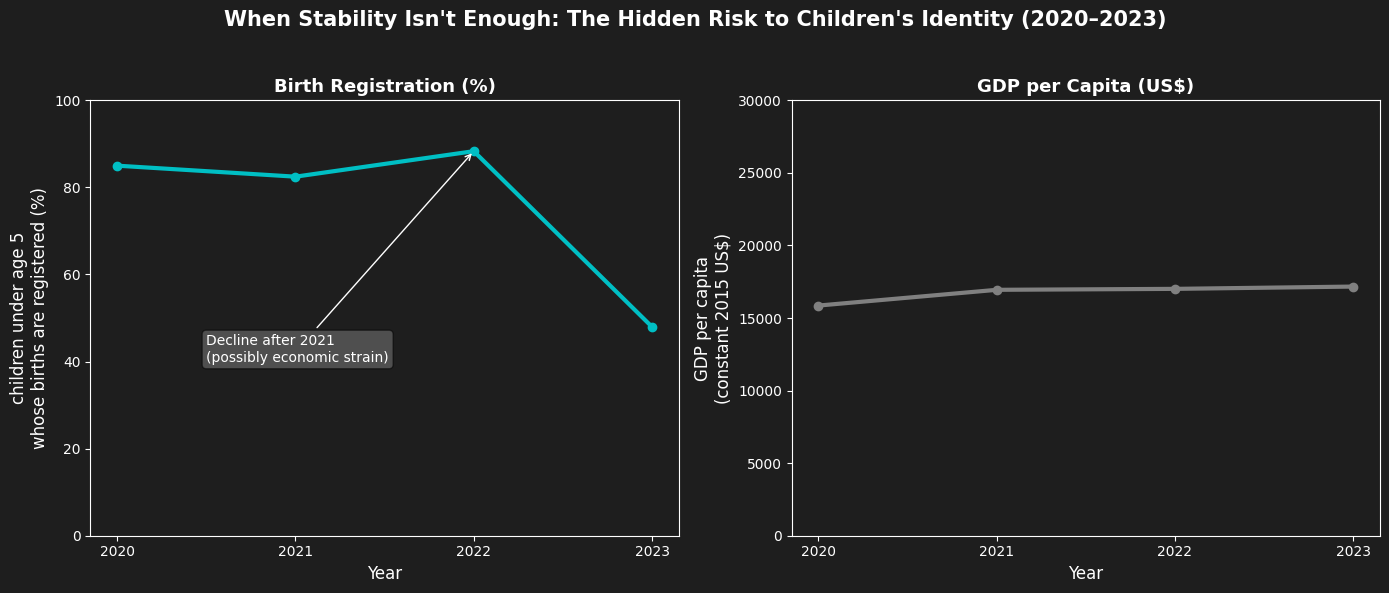

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_indicator_2.csv')
meta = pd.read_csv('C:/Users/Trisha KN/OneDrive/Desktop/Project/Data/unicef_metadata.csv')

birth_total = df[(df["current_age"] == "Under 5 years old") &
                 (df["sex"] == "Total") &
                 (df["time_period"].between(2020, 2023))]

birth_avg = birth_total.groupby("time_period", as_index=False)["obs_value"].mean()
birth_avg.rename(columns={"time_period": "year", "obs_value": "Avg Registration (%)"}, inplace=True)

gdp_filtered = meta[(meta["year"].between(2020, 2023)) &  (meta["GDP per capita (constant 2015 US$)"].notna())]
gdp_avg = gdp_filtered.groupby("year", as_index=False)["GDP per capita (constant 2015 US$)"].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

fig.patch.set_facecolor('#1e1e1e')
ax1.set_facecolor('#1e1e1e')
ax2.set_facecolor('#1e1e1e')

for ax in [ax1, ax2]:
    ax.set_xticks([2020, 2021, 2022, 2023])
    ax.set_xlabel("Year", color='white', fontsize=12)
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

# Chart 1: Birth Registration
ax1.plot(birth_avg["year"], birth_avg["Avg Registration (%)"], color='#00BFC4', linewidth=3, marker='o')
ax1.set_title("Birth Registration (%)", color='white', fontsize=13, fontweight='bold')
ax1.set_ylabel("children under age 5\nwhose births are registered (%)", color='white', fontsize=12)
ax1.set_ylim(0, 100)
ax1.set_yticks(range(0, 101, 20))

# annotation 
ax1.annotate("Decline after 2021\n(possibly economic strain)",
             xy=(2022, birth_avg.loc[birth_avg['year'] == 2022, "Avg Registration (%)"].values[0]),xytext=(2020.5, 40),
             arrowprops=dict(arrowstyle="->", color='white'),fontsize=10, color='white',bbox=dict(boxstyle="round", fc="gray", alpha=0.5))

# Chart 2: GDP per capita
ax2.plot(gdp_avg["year"], gdp_avg["GDP per capita (constant 2015 US$)"], color='gray', linewidth=3, marker='o')
ax2.set_title("GDP per Capita (US$)", color='white', fontsize=13, fontweight='bold')
ax2.set_ylabel("GDP per capita\n(constant 2015 US$)", color='white', fontsize=12)
ax2.set_ylim(0, gdp_avg["GDP per capita (constant 2015 US$)"].max() + 5000)
ax2.set_yticks(range(0, 30001, 5000))

fig.suptitle("When Stability Isn't Enough: The Hidden Risk to Children's Identity (2020–2023)", color='white', fontsize=15, fontweight='bold')

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<p style="
    font-weight: bold;
    font-size: 0.9em;
    text-align: center;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Earlier charts showed a hopeful link: stronger economies often had stronger birth registration systems.<br>
    But prosperity isn't permanent. What happens when economies stall or crises disrupt fragile services?
</p>

<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    <strong>Chart 6</strong> captures that shift. From 2020 to 2022, birth registration steadily improved, paralleling global recovery after the pandemic.However, in 2023, despite GDP per capita holding stable, registration rates <strong>dropped sharply</strong> breaking the upward trend.This disconnect reveals a deeper truth: it’s not just economic growth that matters-it’s the resilience of public services. Even without recession, factors like <strong>inflation, conflict, or budget reallocations</strong> can destabilize civil systems.Health centers and registration units, especially in rural or low resource settings, may be <strong>deprioritized</strong>,making children invisible by default.
</p>

<p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    The most affected are the most vulnerable: Children in rural areas, girls in patriarchal societies, and displaced or conflict affected communities those already at the margins.The 2023 drop is a warning:Stable GDP doesn't guarantee protection if public systems crumble underneath.
</p>


<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    In fragile contexts, <strong>building resilient identity services</strong> matters just as much as economic growth because without registration,millions remain <strong>invisible</strong>, unprotected, and forgotten.
</p>


<div id="conclusion"></div> 

<div style="display: flex; background-color: #222222; padding: 10px;">
<div style="width: 100%; padding: 10px; max-height: 600px; overflow-y: auto; color: white; font-family: 'Segoe UI', sans-serif;">
<p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Across these visualizations, a clear story emerges:<strong>Wealthier nations not only register more children, but they do so more equitably.</strong> But in lower income or crisis affected regions, millions of children especially girls remain invisible from birth.
</p>

<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    While economic strength often enables robust identity systems,growth alone is not enough.Chart 6 drives this point home: even when GDP remains stable, birth registration can decline if public systems lack resilience.What matters most is not just prosperity,but the ability of institutions to protect identity rights in the face of adversity.be it <strong>inflation</strong>, <strong>conflict</strong>, or <strong>budget reallocations</strong>.
</p>

<p style="
    font-weight: bold;
    font-size: 0.9em;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
    Children born into poverty, displacement, or patriarchal settings face compounded risks:they are the first to be left behind when systems falter.
    This is not just a data problem-it’s a <strong>justice</strong> problem.
</p>


<p style="font-size: 0.9em; font-family: 'Segoe UI', sans-serif; color: lightgray;">
    Without a birth certificate, children are denied education, healthcare, legal protection, and often a future.And in 2023 alone, we saw how easily fragile progress can reverse. As countries strive toward <strong> Sustainable Development Goal 16</strong> legal identity for all, including birth registration, the path forward is clear: We must invest in <strong>inclusive, gender equal, and crisis-resilient identity systems</strong>.Because <strong>every child counts but only if they are counted!!</strong>.
</p>
<p style="
    font-weight: bold;
    font-size: 0.8em;
    text-align: center;
    transition: transform 0.3s;
    font-family: 'Segoe UI', sans-serif; 
    color: white;"
    onmouseover="this.style.transform='scale(1.01)'; this.style.color='#708090';"
    onmouseout="this.style.transform='scale(1)'; this.style.color='white';">
 A name,A future,A right-every child deserves to be seen.Help build a world where no child is invisible.
</p>


 <div style="background:#222222; font-family: 'Segoe UI', sans-serif; text-align: center; padding: 40px;"><a href="https://www.unicef.ie/donate/#1" target="_blank" class="liquid-button-donate">Donate to UNICEF here</a></div>

<style>
  .liquid-button-donate {
    display: inline-block;
    text-align: center;
    text-decoration: none;
    background: linear-gradient(135deg, rgba(0,140,186,0.8), rgba(0,188,212,0.8)); 
    padding: 14px 28px;
    border: none;
    border-radius: 40px;
    color: #ffffff;
    font-weight: 600;
    font-size: 1rem;
    letter-spacing: 0.5px;
    position: relative;
    cursor: pointer;
    box-shadow: 0 0 12px rgba(0, 188, 212, 0.4);
    transition: transform 0.2s ease, box-shadow 0.3s ease;
    overflow: hidden;
    margin: 12px 0;
  }

  .liquid-button-donate::before {
    content: '';
    position: absolute;
    top: -60%;
    left: -60%;
    width: 220%;
    height: 220%;
    background: radial-gradient(circle at center, rgba(255,255,255,0.08) 0%, transparent 60%);
    animation: waveDonate 5s linear infinite;
    opacity: 0.3;
  }

  @keyframes waveDonate {
    from { transform: rotate(0deg); }
    to { transform: rotate(360deg); }
  }

  .liquid-button-donate:hover {
    transform: scale(1.03);
    box-shadow: 0 0 20px rgba(0, 188, 212, 0.6);
    color: #fff;
  }
</style>

</div></div>

<div style="background:#222222; font-family: 'Segoe UI', sans-serif; text-align: center; padding:10px;">

  <a href="https://www.unicef.ie/donate/#1" target="_blank">
    <img src="unicef.jpg" 
         alt="UNICEF Logo" 
         style="height: 150px; border-radius: 12px; box-shadow: 0 4px 20px rgba(0, 188, 212, 0.5);" />
  </a>

</div>




<div style="background:#181818; min-height: 100vh; display: flex; flex-direction: column; justify-content: center; align-items: center; font-family: 'Segoe UI', sans-serif;">

  <h2 style="color: white; font-weight: bold; font-size: 2em; border-bottom: 2px solid white; padding-bottom: 10px;">Connect With UNICEF</h2>

  <div style="display: flex; gap: 25px; margin-top: 20px;">

<a href="https://www.linkedin.com/company/unicef/" target="_blank" style="width: 100px; height: 100px; background: rgba(0,0,0,0); color: #0072b1; font-size: 2.5em; display: flex; justify-content: center; align-items: center; text-decoration: none; border-radius: 50%; transition: 0.5s; -webkit-box-reflect: below 5px linear-gradient(to bottom, rgba(0,0,0,0), rgba(0,0,0,0.4));">
      <i class="fa-brands fa-linkedin-in"></i>
    </a>

 <a href="https://www.instagram.com/UNICEF/" target="_blank" style="width: 100px; height: 100px; background: rgba(0,0,0,0); color: #E1306C; font-size: 2.5em; display: flex; justify-content: center; align-items: center; text-decoration: none; border-radius: 50%; transition: 0.5s; -webkit-box-reflect: below 5px linear-gradient(to bottom, rgba(0,0,0,0), rgba(0,0,0,0.4));">
      <i class="fa-brands fa-instagram"></i>
    </a>

 <a href="https://www.facebook.com/unicef/" target="_blank" style="width: 100px; height: 100px; background: rgba(0,0,0,0); color: #4267B2; font-size: 2.5em; display: flex; justify-content: center; align-items: center; text-decoration: none; border-radius: 50%; transition: 0.5s; -webkit-box-reflect: below 5px linear-gradient(to bottom, rgba(0,0,0,0), rgba(0,0,0,0.4));">
      <i class="fa-brands fa-facebook-f"></i>
    </a>

<a href="https://www.unicef.ie/" target="_blank" style="width: 100px; height: 100px; background: rgba(0,0,0,0); color: #00ADEF; font-size: 2.5em; display: flex; justify-content: center; align-items: center; text-decoration: none; border-radius: 50%; transition: 0.5s; -webkit-box-reflect: below 5px linear-gradient(to bottom, rgba(0,0,0,0), rgba(0,0,0,0.4));">
      <i class="fa-solid fa-globe"></i>
    </a>

  </div>
</div>

<link rel="stylesheet" href="https://use.fontawesome.com/releases/v6.4.2/css/all.css">


</div>